In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


# Gather

In [2]:
churn=pd.read_csv('Churn_Modelling.csv')
churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Assess

In [3]:
#Find duplicates
churn.duplicated().sum()

0

In [4]:
#Look for missing values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#make a copy of the original dataset
churn_copy=churn.copy()

# Cleaning

In [7]:
churn_copy.rename(columns={'NumOfProducts':'Number_of_Products','HasCrCard':'Has_credit_card'},inplace=True)

In [8]:
churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   Number_of_Products  10000 non-null  int64  
 10  Has_credit_card     10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
churn_copy.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [10]:
#Group the age column into groups
bin_edges=[18,31,36,43,92]
label_names=['Young_adults','Middle_adults','Senior_adults','Old_adults']
churn_copy['Age_groups']=pd.cut(churn_copy['Age'],bin_edges,labels=label_names)

In [11]:
churn_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   RowNumber           10000 non-null  int64   
 1   CustomerId          10000 non-null  int64   
 2   Surname             10000 non-null  object  
 3   CreditScore         10000 non-null  int64   
 4   Geography           10000 non-null  object  
 5   Gender              10000 non-null  object  
 6   Age                 10000 non-null  int64   
 7   Tenure              10000 non-null  int64   
 8   Balance             10000 non-null  float64 
 9   Number_of_Products  10000 non-null  int64   
 10  Has_credit_card     10000 non-null  int64   
 11  IsActiveMember      10000 non-null  int64   
 12  EstimatedSalary     10000 non-null  float64 
 13  Exited              10000 non-null  int64   
 14  Age_groups          9978 non-null   category
dtypes: category(1), float64(2), int64(9),

In [12]:
churn_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Number_of_Products,Has_credit_card,IsActiveMember,EstimatedSalary,Exited,Age_groups
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Senior_adults
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Senior_adults
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Senior_adults
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Senior_adults
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Senior_adults


# Analysis and Visualization

### Q1. Is their a relationship between credit score and age?

In [13]:
churn_copy[['Age','CreditScore']].describe()

,Age,CreditScore
count,10000.000000,10000.000000
mean,38.921800,650.528800
std,10.487806,96.653299
min,18.000000,350.000000
25%,32.000000,584.000000
50%,37.000000,652.000000
75%,44.000000,718.000000
max,92.000000,850.000000


In [14]:
churn_copy.groupby('Age_groups')['CreditScore'].mean()

Age_groups
Young_adults     651.231915
Middle_adults    650.497988
Senior_adults    651.886901
Old_adults       648.151714
Name: CreditScore, dtype: float64

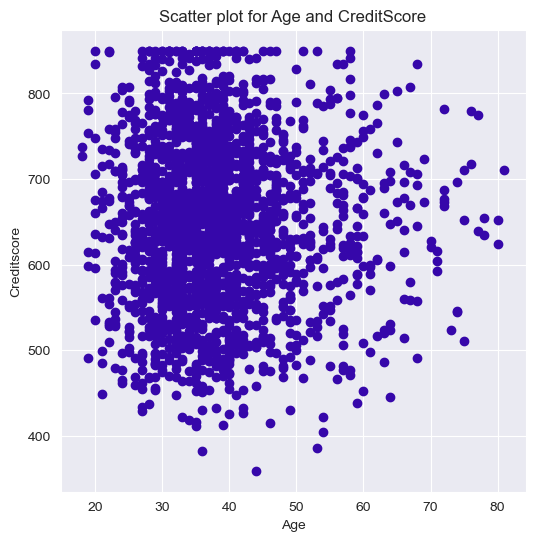

In [15]:
#plot a scatter plot
fig,ax=plt.subplots(figsize=(6,6))
age=churn_copy.Age[::5]
credit=churn_copy.CreditScore[::5]
ax.scatter(age,credit,color='#3607AA')
ax.set(title='Scatter plot for Age and CreditScore',xlabel='Age',ylabel='Creditscore');

 ### Their is no relationship between age and Creditscore

### Q2. Which geographical region has the highest credit score?


In [16]:
#find the mean of the geographical areas
churn_copy.groupby('Geography')['CreditScore'].mean()

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64

### Germany has the highest credit score 

### Q3. What is the percentage and number of customers who exited and remained?

In [17]:
number=churn_copy.Exited.value_counts()
number

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
#find the percentage
exited=number.values[1]
remained=number.values[0]
total=exited + remained
print(exited/total * 100, "% exited and ",remained/total *100, "remained")

20.369999999999997 % exited and  79.63 remained


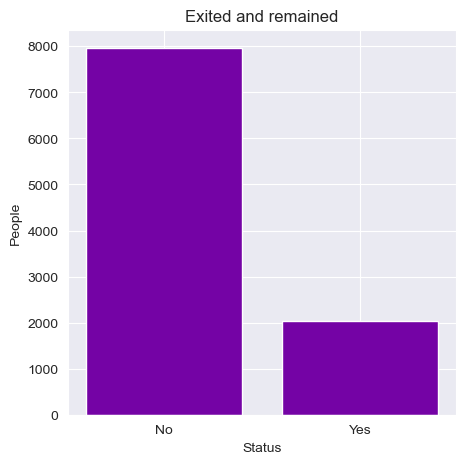

In [19]:
locations=[1,2]
labels=['No','Yes']
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(locations,number.values,tick_label=labels,color='#7403A5')
ax.set(title='Exited and remained',xlabel='Status',ylabel='People');


### 7962 customers remained and 2037 customers exited. That's 79.63% and 20.37% of customers. 

### Q4. Have more males or females exited?

In [20]:
#query the Gender column
male=churn_copy.query('Gender == "Male" and Exited == 1')
female=churn_copy.query('Gender == "Female" and Exited ==1')

In [21]:
print(len(male))
print(len(female))

898
1139


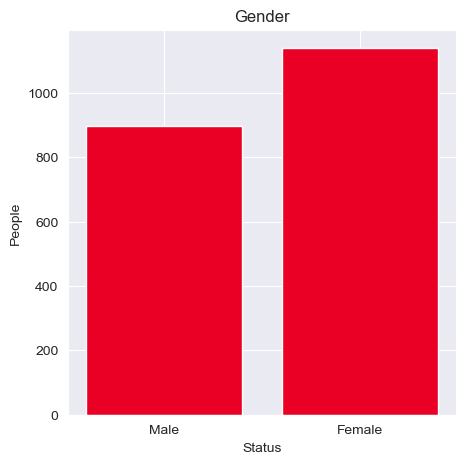

In [22]:
#plot a bar graph
locations=[1,2]
labels=['Male','Female']
values=[len(male),len(female)]
fig,ax=plt.subplots(figsize=(5,5))
ax.bar(locations,values,tick_label=labels,color='#EA0025')
ax.set(title='Gender',xlabel='Status',ylabel='People');


### More female customers have exited than males.

### Q5. Is their a relationship between tenure and credit score


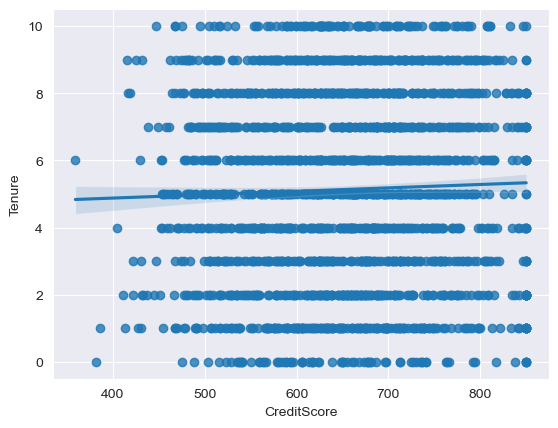

In [23]:
sns.regplot(x="CreditScore", y="Tenure", data=churn_copy[::5]);

### Their is a weak relationship between Tenure and creditscore. Customers with higher credit score have more tenures

### Q6. Is their a relationship between Estimated_salary and Age?

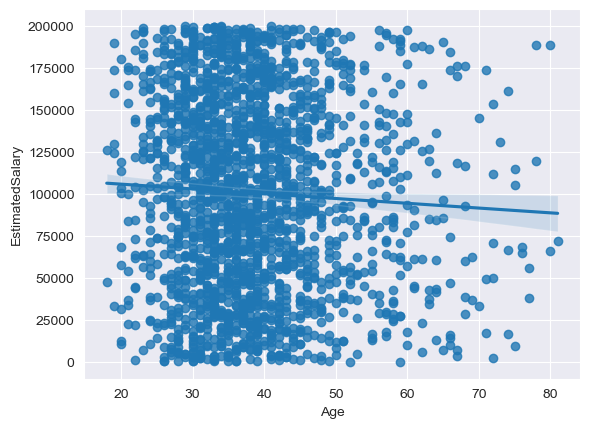

In [24]:
sns.regplot(x="Age", y="EstimatedSalary", data=churn_copy[::5]);

### Their is a weak relationship between EstimatedSalary and Age. Younger customers have a higher Estimated salary compared to the older generation


## According to my findings:
  ### Q1.Their is no relationship between age and Creditscore
  ### Q2. Germany has the highest credit score
  ### Q3. 7962 customers remained and 2037 customers exited. That's 79.63% and 20.37% of customers.
  ### Q4. More female customers have exited than males.
  ### Q5. Their is a weak relationship between Tenure and creditscore. Customers with higher credit score have more tenures
  ### Q6. Their is a weak relationship between EstimatedSalary and Age. Younger customers have a higher Estimated salary compared to the older generation

In [25]:
x=churn_copy.iloc[:,[3,6,7,9,10,11]].values
y=churn_copy.iloc[:,[13]].values

# Modelling with logistic regression

In [26]:
churn_copy

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Number_of_Products,Has_credit_card,IsActiveMember,EstimatedSalary,Exited,Age_groups
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Senior_adults
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Senior_adults
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Senior_adults
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Senior_adults
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Senior_adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,Senior_adults
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,Middle_adults
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,Middle_adults
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,Senior_adults


In [30]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
X_train.shape

(7000, 6)

In [33]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [36]:
#Train the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,fit_intercept=True)
classifier.fit(X_train,y_train.ravel())

LogisticRegression(random_state=0)

In [37]:
y_pred=classifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
  
print ("Confusion Matrix : \n", confusion)

Confusion Matrix : 
 [[2311   68]
 [ 538   83]]


In [40]:
#Get the accuracy score
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.798


In [41]:
#evaluate the model on the training and test data
classifier.score(X_train,y_train)

0.8068571428571428

In [42]:
classifier.score(X_test,y_test)

0.798

In [44]:
#save the model
import pickle
pickle.dump(classifier,open('Logistic_regression_churn_model,pkl','wb'))